In [1]:
%pip install pycaret

In [2]:
import pandas as pd
air_data = pd.read_csv('C:\\Users\\ASUS\\Desktop\\VS code\\PsuTerm02\\241-152\\final_project\\data_mange\\clean02_air4thai_44t_2023-01-01_2024-02-27.csv')
air_data = air_data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'stationID'], axis=1, inplace=False)
air_data['DATETIMEDATA'] = pd.to_datetime(air_data['DATETIMEDATA'])
air_data

,DATETIMEDATA,PM25,O3,WS,TEMP,RH,WD
0,2024-01-01 00:00:00,16.5,16.0,1,27.0,79,115
1,2024-01-01 01:00:00,33.6,0.0,1,27.0,82,97
2,2024-01-01 02:00:00,34.2,0.0,1,26.0,84,96
3,2024-01-01 03:00:00,20.1,0.0,1,26.0,82,108
4,2024-01-01 04:00:00,16.5,1.0,1,27.0,79,106
...,...,...,...,...,...,...,...
1387,2024-02-27 19:00:00,21.7,9.0,1,29.0,67,162
1388,2024-02-27 20:00:00,17.5,1.0,1,29.0,68,134
1389,2024-02-27 21:00:00,21.1,0.0,1,29.0,69,140
1390,2024-02-27 22:00:00,23.2,0.0,1,29.0,70,111


In [3]:
from pycaret.regression import *
s = setup(air_data, target = 'PM25', session_id = 123, date_features=['DATETIMEDATA'], normalize=True)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(1392, 7)"
4,Transformed data shape,"(1392, 9)"
5,Transformed train set shape,"(974, 9)"
6,Transformed test set shape,"(418, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


In [4]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.1537,17.3376,4.1553,0.3660,0.2215,0.1915,0.0290
rf,Random Forest Regressor,3.2070,17.4943,4.1732,0.3604,0.2232,0.1961,0.0400
gbr,Gradient Boosting Regressor,3.3624,18.5104,4.2917,0.3270,0.2310,0.2074,0.0160
lightgbm,Light Gradient Boosting Machine,3.3822,19.5041,4.4069,0.2861,0.2352,0.2060,0.2170
knn,K Neighbors Regressor,3.5001,20.7580,4.5510,0.2383,0.2430,0.2127,0.0090
ada,AdaBoost Regressor,3.8053,22.7285,4.7499,0.1749,0.2618,0.2483,0.0100
lr,Linear Regression,3.8731,24.0265,4.8841,0.1338,0.2656,0.2432,0.2910
ridge,Ridge Regression,3.8735,24.0262,4.8840,0.1338,0.2656,0.2432,0.0090
br,Bayesian Ridge,3.8808,24.0450,4.8856,0.1335,0.2659,0.2441,0.0080
huber,Huber Regressor,3.8439,24.2355,4.9049,0.1267,0.2641,0.2369,0.0070


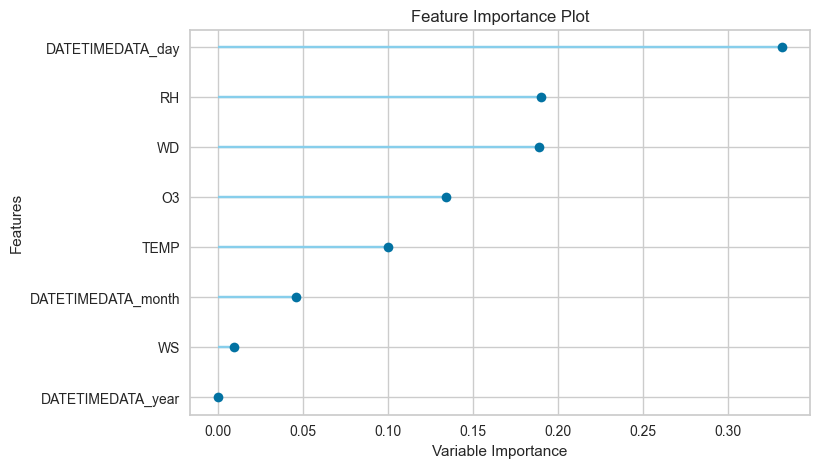

In [5]:
plot_model(best_model, plot = 'feature')

In [6]:
et_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2559,21.3443,4.6200,0.2907,0.2344,0.1961
1,3.0177,15.4259,3.9276,0.4650,0.2166,0.1902
2,2.9940,14.0281,3.7454,0.2794,0.2117,0.1922
3,3.2569,18.1465,4.2599,0.3976,0.2240,0.1902
4,3.0181,15.5019,3.9372,0.4536,0.2148,0.1835
5,3.3614,18.2470,4.2716,0.4802,0.2235,0.1990
6,2.9797,15.3763,3.9213,0.3090,0.2079,0.1664
7,3.0762,18.0875,4.2529,0.4280,0.2163,0.1856
8,3.0732,16.7918,4.0978,0.1889,0.2141,0.1817


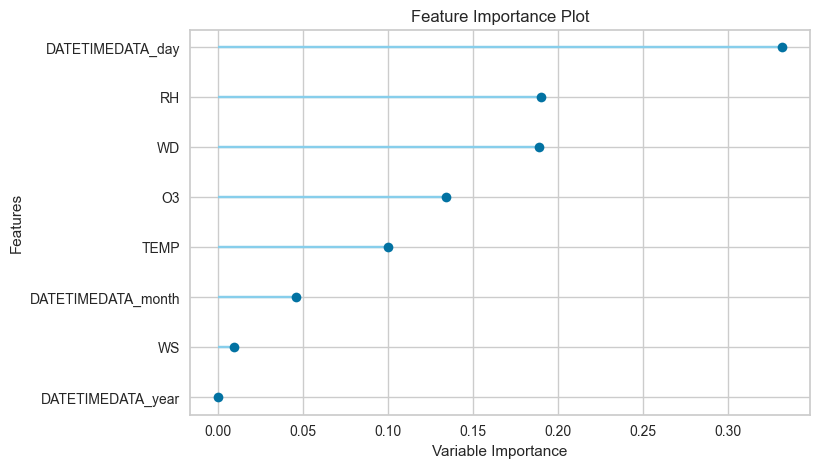

In [7]:
plot_model(et_model, plot = 'feature')

In [8]:
tuned_et_model = tune_model(et_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6534,22.4617,4.7394,0.2535,0.2510,0.2266
1,3.5303,18.5975,4.3125,0.3550,0.2461,0.2313
2,3.2304,15.5841,3.9477,0.1995,0.2297,0.2128
3,3.4570,19.6928,4.4377,0.3463,0.2331,0.2079
4,3.2689,16.7843,4.0969,0.4084,0.2245,0.2032
5,3.9632,23.7708,4.8755,0.3228,0.2674,0.2480
6,3.3550,16.7334,4.0907,0.2480,0.2133,0.1918
7,3.4936,21.7663,4.6654,0.3117,0.2406,0.2152
8,3.0674,16.3368,4.0419,0.2108,0.2108,0.1795


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
auto_ensemble_tuned_et_model = ensemble_model(tuned_et_model, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2253,19.8936,4.4602,0.3389,0.2274,0.1920
1,3.0774,15.7650,3.9705,0.4533,0.2174,0.1930
2,2.9417,13.6560,3.6954,0.2985,0.2101,0.1884
3,3.3528,18.2915,4.2769,0.3928,0.2234,0.1970
4,3.1262,16.0911,4.0114,0.4329,0.2184,0.1914
5,3.4055,17.9775,4.2400,0.4878,0.2242,0.2040
6,3.0190,14.7894,3.8457,0.3354,0.2007,0.1703
7,3.1022,17.5289,4.1867,0.4457,0.2093,0.1842
8,2.9659,15.9820,3.9978,0.2280,0.2079,0.1745


In [10]:
set20_ensemble_tuned_et_model = ensemble_model(tuned_et_model, method='Bagging', n_estimators=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2297,19.7389,4.4428,0.3440,0.2265,0.1928
1,3.0624,15.8315,3.9789,0.4510,0.2188,0.1931
2,2.9509,13.7306,3.7055,0.2947,0.2114,0.1898
3,3.3210,18.1014,4.2546,0.3991,0.2221,0.1945
4,3.0776,15.6454,3.9554,0.4486,0.2158,0.1888
5,3.4175,18.2523,4.2723,0.4800,0.2251,0.2047
6,2.9967,14.6699,3.8301,0.3408,0.1990,0.1687
7,3.1365,17.6155,4.1971,0.4430,0.2116,0.1875
8,2.9286,15.6252,3.9529,0.2452,0.2058,0.1726


In [11]:
set50_ensemble_tuned_et_model = ensemble_model(tuned_et_model, method='Bagging', n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2701,20.2105,4.4956,0.3283,0.2291,0.1958
1,3.0860,15.8836,3.9854,0.4491,0.2188,0.1943
2,2.9762,13.8510,3.7217,0.2885,0.2128,0.1918
3,3.2755,17.9075,4.2317,0.4056,0.2209,0.1924
4,3.0591,15.5860,3.9479,0.4507,0.2145,0.1868
5,3.3945,18.2480,4.2718,0.4801,0.2236,0.2020
6,3.0030,14.8762,3.8570,0.3315,0.2008,0.1693
7,3.1479,17.9593,4.2378,0.4321,0.2136,0.1884
8,2.9300,15.7182,3.9646,0.2407,0.2059,0.1726


In [12]:
set70_ensemble_tuned_et_model = ensemble_model(tuned_et_model, method='Bagging', n_estimators=70)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2618,20.0774,4.4808,0.3328,0.2282,0.1954
1,3.0972,15.9649,3.9956,0.4463,0.2196,0.1952
2,2.9889,13.9372,3.7333,0.2841,0.2138,0.1930
3,3.2762,17.7998,4.2190,0.4091,0.2205,0.1928
4,3.0528,15.5407,3.9422,0.4523,0.2144,0.1867
5,3.4105,18.3237,4.2806,0.4780,0.2239,0.2029
6,3.0180,14.9383,3.8650,0.3287,0.2013,0.1699
7,3.1380,17.8288,4.2224,0.4362,0.2132,0.1880
8,2.9510,15.7566,3.9695,0.2389,0.2066,0.1740


In [13]:
set100_ensemble_tuned_et_model = ensemble_model(tuned_et_model, method='Bagging', n_estimators=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2675,20.1255,4.4861,0.3312,0.2287,0.1960
1,3.0987,16.0261,4.0033,0.4442,0.2197,0.1952
2,2.9841,13.8891,3.7268,0.2866,0.2135,0.1928
3,3.2817,17.8386,4.2236,0.4079,0.2204,0.1929
4,3.0422,15.5423,3.9424,0.4522,0.2142,0.1857
5,3.4191,18.4396,4.2941,0.4747,0.2249,0.2036
6,3.0230,14.9067,3.8609,0.3301,0.2011,0.1703
7,3.1519,17.9351,4.2350,0.4329,0.2139,0.1893
8,2.9304,15.6288,3.9533,0.2450,0.2057,0.1728


In [14]:
set150_ensemble_tuned_et_model = ensemble_model(tuned_et_model, method='Bagging', n_estimators=150)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2793,20.2434,4.4993,0.3272,0.2294,0.1966
1,3.0964,16.0110,4.0014,0.4447,0.2197,0.1952
2,2.9753,13.8991,3.7282,0.2860,0.2136,0.1924
3,3.2931,17.9704,4.2392,0.4035,0.2209,0.1935
4,3.0477,15.4918,3.9360,0.4540,0.2142,0.1863
5,3.4079,18.3288,4.2812,0.4778,0.2246,0.2034
6,3.0173,14.9024,3.8604,0.3303,0.2008,0.1699
7,3.1611,18.0514,4.2487,0.4292,0.2144,0.1897
8,2.9279,15.6805,3.9599,0.2425,0.2060,0.1726


In [15]:
set200_ensemble_tuned_et_model = ensemble_model(tuned_et_model, method='Bagging', n_estimators=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2785,20.1636,4.4904,0.3299,0.2291,0.1968
1,3.0950,16.0417,4.0052,0.4437,0.2197,0.1950
2,2.9806,13.9059,3.7291,0.2857,0.2137,0.1929
3,3.2905,17.9799,4.2403,0.4032,0.2208,0.1934
4,3.0511,15.5161,3.9390,0.4531,0.2143,0.1865
5,3.3945,18.1954,4.2656,0.4816,0.2238,0.2023
6,3.0181,14.8744,3.8567,0.3316,0.2005,0.1699
7,3.1611,18.0732,4.2513,0.4285,0.2146,0.1900
8,2.9245,15.6364,3.9543,0.2447,0.2058,0.1724


In [16]:
best_et_model = compare_models(include=[auto_ensemble_tuned_et_model, set20_ensemble_tuned_et_model, set50_ensemble_tuned_et_model, set50_ensemble_tuned_et_model, set70_ensemble_tuned_et_model, set100_ensemble_tuned_et_model, set150_ensemble_tuned_et_model, set200_ensemble_tuned_et_model])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
1,Bagging Regressor,3.1621,16.8668,4.1001,0.3844,0.2184,0.1924,0.7520
0,Bagging Regressor,3.1660,16.9199,4.1069,0.3818,0.2186,0.1924,1.0570
4,Bagging Regressor,3.1673,16.9300,4.1082,0.3814,0.2188,0.1928,1.6750
2,Bagging Regressor,3.1622,16.9523,4.1105,0.3810,0.2187,0.1924,1.1030
3,Bagging Regressor,3.1622,16.9523,4.1105,0.3810,0.2187,0.1924,1.1390
5,Bagging Regressor,3.1683,16.9537,4.1108,0.3810,0.2189,0.1929,2.6620
7,Bagging Regressor,3.1693,16.9786,4.1136,0.3801,0.2190,0.1931,9.1060
6,Bagging Regressor,3.1711,16.9964,4.1157,0.3795,0.2191,0.1931,5.1690


In [17]:
lastest_date = air_data['DATETIMEDATA'].max()


start_date = lastest_date + pd.DateOffset(hours=1)
end_date = start_date + pd.DateOffset(days=30, hours=23)
next_week = pd.date_range(start=start_date, end=end_date, freq='D')


next_week_data = pd.DataFrame({'DATETIMEDATA': next_week})


next_week_data['O3'] = 0
next_week_data['WS'] = 0
next_week_data['TEMP'] = 0
next_week_data['RH'] = 0
next_week_data['WD'] = 0

model_predictions = predict_model(best_et_model, data=next_week_data)
predict_oneweek_data = pd.DataFrame(model_predictions, columns=['DATETIMEDATA', 'prediction_label'])
print(predict_oneweek_data)


   DATETIMEDATA  prediction_label
0    2024-02-28         20.876148
1    2024-02-29         20.906548
2    2024-03-01         17.816406
3    2024-03-02         17.765773
4    2024-03-03         17.605491
5    2024-03-04         17.677054
6    2024-03-05         18.157787
7    2024-03-06         17.868206
8    2024-03-07         18.157895
9    2024-03-08         18.353716
10   2024-03-09         18.348475
11   2024-03-10         18.152232
12   2024-03-11         18.177011
13   2024-03-12         18.301549
14   2024-03-13         18.029960
15   2024-03-14         17.792503
16   2024-03-15         17.510718
17   2024-03-16         17.311690
18   2024-03-17         17.128144
19   2024-03-18         17.084596
20   2024-03-19         18.347633
21   2024-03-20         22.937258
22   2024-03-21         24.763919
23   2024-03-22         22.925473
24   2024-03-23         20.880092
25   2024-03-24         20.645122
26   2024-03-25         20.532136
27   2024-03-26         20.893498
28   2024-03-2

In [18]:
predict_oneweek_data.to_csv('C:\\Users\\ASUS\\Desktop\\VS code\\PsuTerm02\\241-152\\final_project\\predict_data\\predictions_PM25.csv')
